<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Single_Cell_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy

In [2]:
!pip install scvi-tools

In [3]:
!pip install -i https://test.pypi.org/simple/ "scikit-misc==0.2.0rc1"

Looking in indexes: https://test.pypi.org/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import gzip
import shutil
import os

# List of .gz file paths
gz_file_paths = []

for root, dirs, files in os.walk("/content/drive/MyDrive/GSE171524_RAW/"):
    for file in files:
        if file.endswith(".gz"):
            gz_file_paths.append(os.path.join(root, file))

# Split the list of files into three groups
group_size = len(gz_file_paths) // 3
group1 = gz_file_paths[:group_size]
group2 = gz_file_paths[group_size:group_size*2]
group3 = gz_file_paths[group_size*2:]

# Directories for extracted files
output_dirs = ["/content/Extracted/extract1",
               "/content/Extracted/extract2",
               "/content/Extracted/extract3"]

# Make sure the output directories exist
for output_dir in output_dirs:
    os.makedirs(output_dir, exist_ok=True)

# Function to extract a group of files to a specified directory
def extract_group(gz_files, output_dir):
    for gz_file_path in gz_files:
        # Determine output file name by removing .gz extension
        output_file_path = os.path.join(output_dir, os.path.basename(gz_file_path).replace('.gz', ''))

        # Open the gz file and write its decompressed content
        with gzip.open(gz_file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f"Extracted: {gz_file_path} to {output_file_path}")

# Extract files into their respective folders
extract_group(group1, output_dirs[0])
extract_group(group2, output_dirs[1])
extract_group(group3, output_dirs[2])


Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226574_C51ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226574_C51ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226575_C52ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226575_C52ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226576_C53ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226576_C53ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226577_C54ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226577_C54ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226578_C55ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226578_C55ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226579_C56ctr_raw_counts.csv.gz to /content/Extracted/extract1/GSM5226579_C56ctr_raw_counts.csv
Extracted: /content/drive/MyDrive/GSE171524_RAW/GSM5226580_C57ctr_raw_counts.csv.gz to /content/Extracted/extrac

In [ ]:
import scanpy as sc
adata = sc.read_csv('/content/Extracted/GSM5226574_C51ctr_raw_counts.csv')
adata.X.shape

(34546, 6099)

In case I forgot

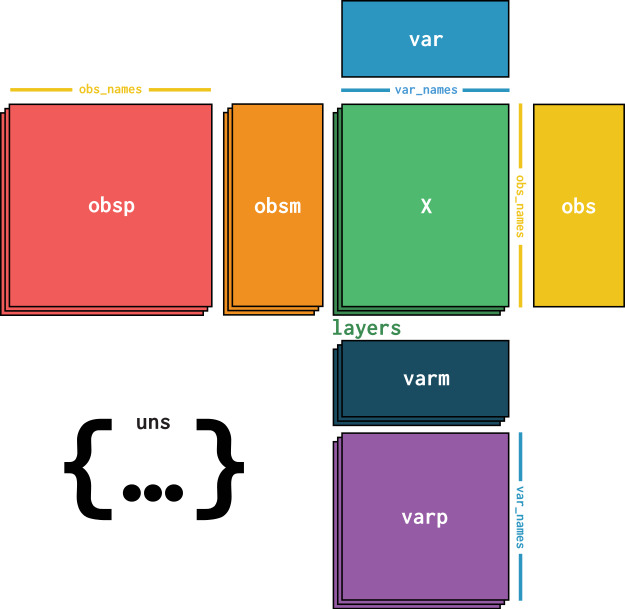

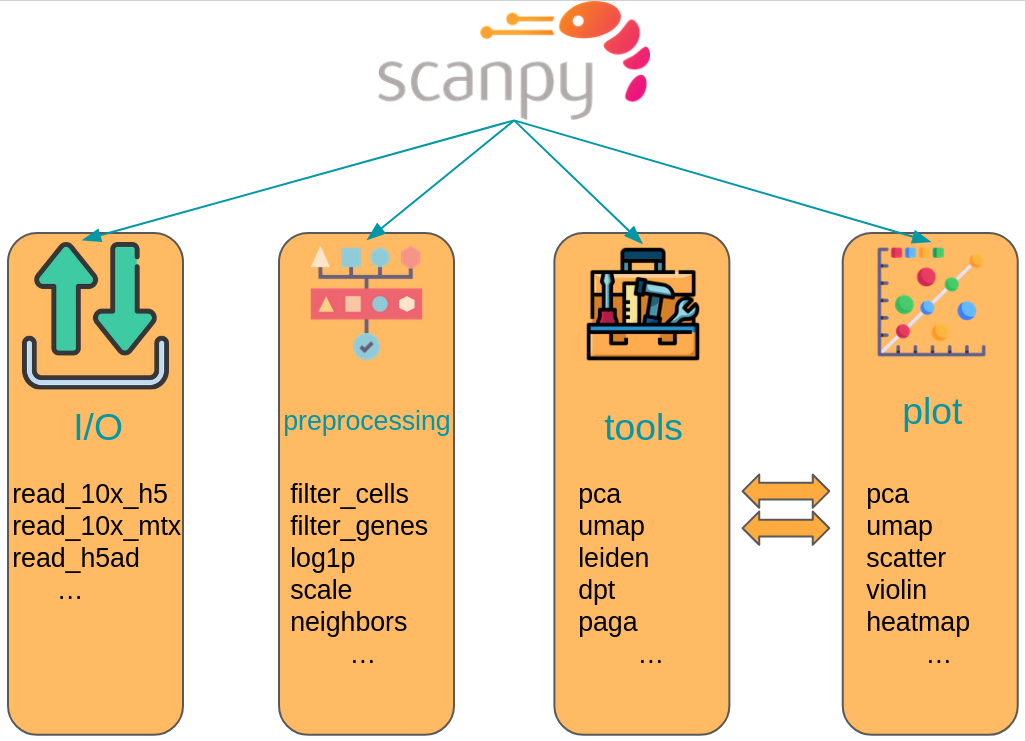

In [ ]:
import scvi

sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [ ]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.430. Signaling Trainer to stop.


In [ ]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df.index = df.index.map(lambda x: x[:-2])

df

/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
LINC014,0.010536,0.989464,singlet
NOC,0.001025,0.998975,singlet
C1orf1,0.002283,0.997717,singlet
UBE2,0.139698,0.860302,singlet
INTS,0.037624,0.962376,singlet
...,...,...,...
MT-N,0.636292,0.363708,doublet
MT-N,0.401857,0.598143,singlet
MT-N,0.603334,0.396666,doublet
MT-C,0.622547,0.377453,doublet


In [ ]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
LINC014,0.010536,0.989464,singlet,-0.978929
NOC,0.001025,0.998975,singlet,-0.997950
C1orf1,0.002283,0.997717,singlet,-0.995433
UBE2,0.139698,0.860302,singlet,-0.720605
INTS,0.037624,0.962376,singlet,-0.924752
...,...,...,...,...
MT-N,0.636292,0.363708,doublet,0.272583
MT-N,0.401857,0.598143,singlet,-0.196286
MT-N,0.603334,0.396666,doublet,0.206669
MT-C,0.622547,0.377453,doublet,0.245093


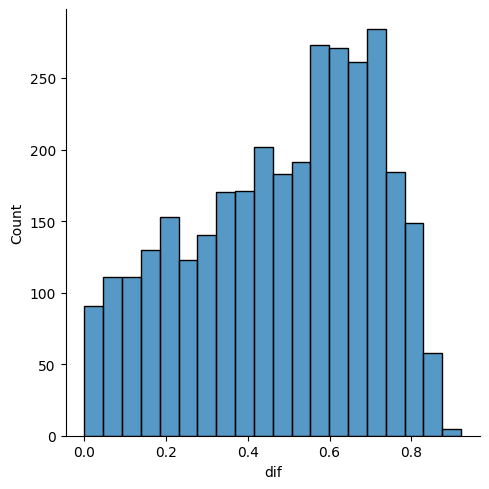

In [ ]:
import seaborn as sns
sns.displot(df[df.prediction == 'doublet'], x = 'dif')


In [ ]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif


In [ ]:
adata = sc.read_csv('/content/Extracted/GSM5226574_C51ctr_raw_counts.csv')
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata = adata[~adata.obs.doublet]
adata.var['mt'] = adata.var.index.str.startswith('MT-')

<ipython-input-13-6777f334d22b>:4: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [6]:
import pandas as pd
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


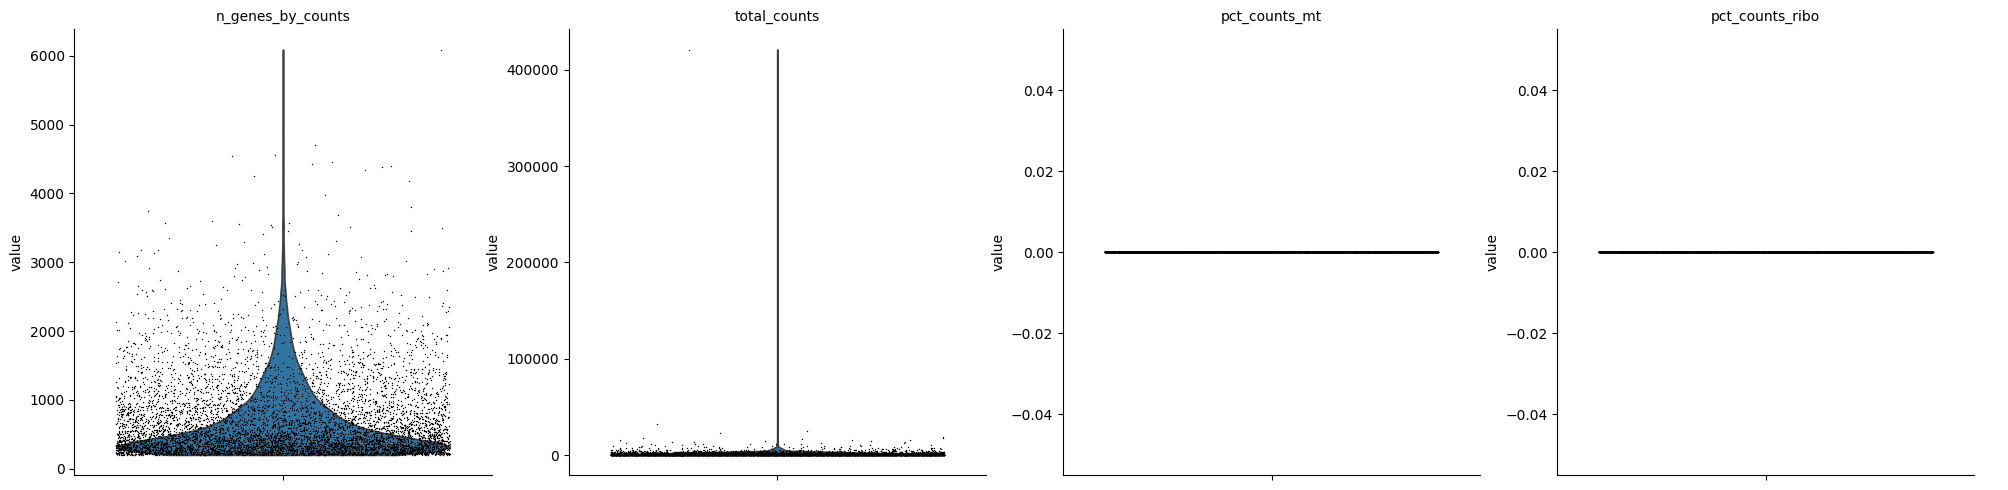

In [ ]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
adata.var.sort_values('n_cells_by_counts')
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.filter_cells(adata, min_genes=200)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [ ]:
import numpy as np
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
adata = adata[adata.obs.n_genes_by_counts < upper_lim]
adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]
adata.X.sum(axis = 1)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.X.sum(axis = 1)
adata.raw = adata

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


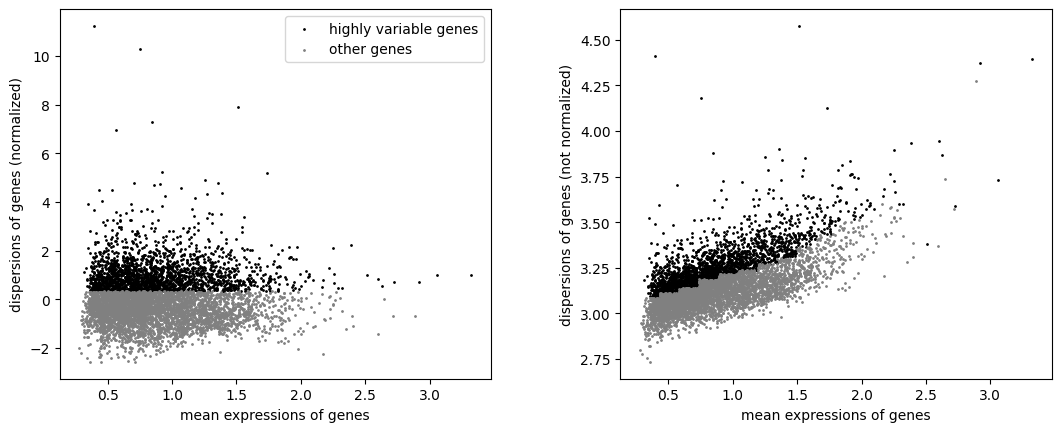

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
sc.pl.highly_variable_genes(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


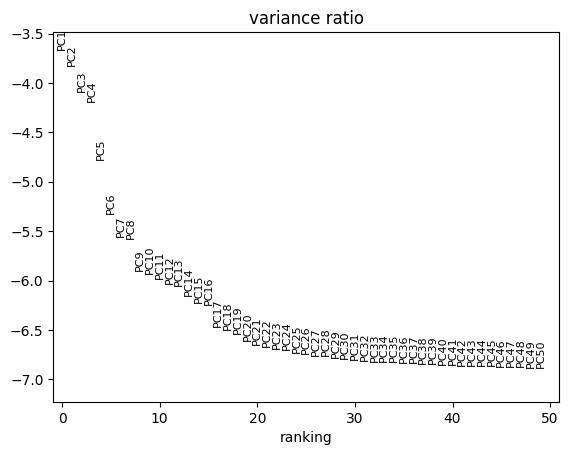

In [ ]:
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)
sc.pp.neighbors(adata, n_pcs = 30)

In [ ]:
!locale

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
!pip install leidenalg

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

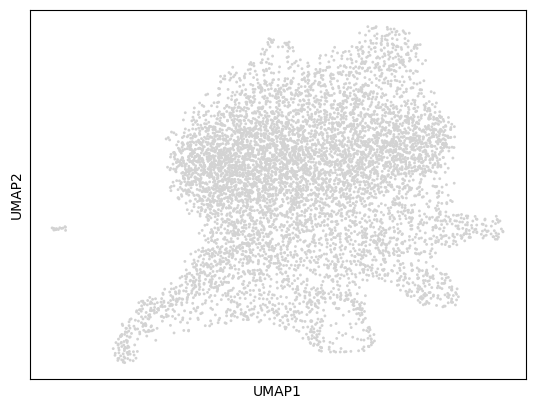

ImportError: Please install the igraph package: `conda install -c conda-forge python-igraph` or `pip3 install igraph`.

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden'])

In [7]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
from scipy.sparse import csr_matrix

def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2]

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]


    sc.pp.filter_cells(adata, min_genes=200)

    adata.var['mt'] = adata.var_names.str.startswith('mt-')
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

out_1 = []
out_2 = []
out_3 = []
count = 1




In [ ]:
for files in os.listdir('/content/Extracted/extract1'):
  out_1.append(pp(os.path.join('/content/Extracted/extract1',files)))
adata = sc.concat(out_1)
sc.pp.filter_genes(adata, min_cells = 10)
adata.X = csr_matrix(adata.X)
adata.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/concat_item_1.h5ad')

In [8]:
for files in os.listdir('/content/Extracted/extract2'):
  out_2.append(pp(os.path.join('/content/Extracted/extract2',files)))
adata = sc.concat(out_2)
sc.pp.filter_genes(adata, min_cells = 10)
adata.X = csr_matrix(adata.X)
adata.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/concat_item_2.h5ad')

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.234. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.347. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.255. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.359. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.296. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.328. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.296. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.325. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.354. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [9]:
for files in os.listdir('/content/Extracted/extract3'):
  out_3.append(pp(os.path.join('/content/Extracted/extract3',files)))
adata = sc.concat(out_3)
sc.pp.filter_genes(adata, min_cells = 10)
adata.X = csr_matrix(adata.X)
adata.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/concat_item_3.h5ad')

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.330. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.196. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.284. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.323. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.374. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.292. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.296. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
INFO: GPU available: True (cuda), 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider incre

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.287. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [ ]:
adata = sc.concat(out)

In [ ]:
sc.pp.filter_genes(adata, min_cells = 10)

In [ ]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)
adata.write_h5ad('concat_item.h5ad')

In [12]:
import anndata as ad
import scanpy as sc

# List of file paths to your .h5ad files
file_paths = ["/content/drive/MyDrive/Yeehaw_datasets/concat_item_1.h5ad", "/content/drive/MyDrive/Yeehaw_datasets/concat_item_2.h5ad", "/content/drive/MyDrive/Yeehaw_datasets/concat_item_3.h5ad"]
adatas = [sc.read_h5ad(file) for file in file_paths]


In [13]:
combined_data = sc.concat(adatas)

In [15]:
combined_data.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/concat_data.h5ad')

In [16]:
adata = combined_data.copy()

In [17]:
adata.obs.groupby('Sample').count()

<ipython-input-17-ef4b39e87ee7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Sample').count()


,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
raw,108822,108822,108822,108822,108822,108822,108822,108822


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['doublet']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'doublet'}, axis=1)
              .sort_values('doublet', ascending=True))
  xs = counted['doublet']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('doublet', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('doublet')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['n_genes']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'n_genes'}, axis=1)
              .sort_values('n_genes', ascending=True))
  xs = counted['n_genes']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('n_genes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_genes')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['n_genes_by_counts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'n_genes_by_counts'}, axis=1)
              .sort_values('n_genes_by_counts', ascending=True))
  xs = counted['n_genes_by_counts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('n_genes_by_counts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('n_genes_by_counts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_counts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_counts'}, axis=1)
              .sort_values('total_counts', ascending=True))
  xs = counted['total_counts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('total_counts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_counts')
_ = plt.ylabel('count()')

In [18]:
sc.pp.filter_genes(adata, min_cells = 100)

In [19]:
adata

AnnData object with n_obs × n_vars = 108822 × 21206
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [20]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
adata.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CCCGGAAAGAAATTGC-1_4,raw,False,1627,1627,3958.0,0.0,0.0,2.0,0.050531
ATGACCAAGTCCCTAA-1_4,raw,False,1940,1940,3848.0,0.0,0.0,0.0,0.000000
ACGTAACGTCACTCTC-1_4,raw,False,1933,1933,3739.0,0.0,0.0,1.0,0.026745
TGCTCGTTCCTCGATC-1_4,raw,False,1790,1790,3650.0,0.0,0.0,1.0,0.027397
TCCTTCTCAACAAGAT-1_4,raw,False,1923,1923,3638.0,0.0,0.0,1.0,0.027488


In [21]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [22]:
model = scvi.model.SCVI(adata)
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/74 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=74` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=74` reached.


In [26]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [27]:
!pip3 install --quiet leidenalg
!pip install --quiet louvain scanpy
!pip install --quiet kb-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 4.2 MB/s eta 0:00:00


In [28]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [29]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [30]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

<ipython-input-30-bdad7b95cfcc>:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


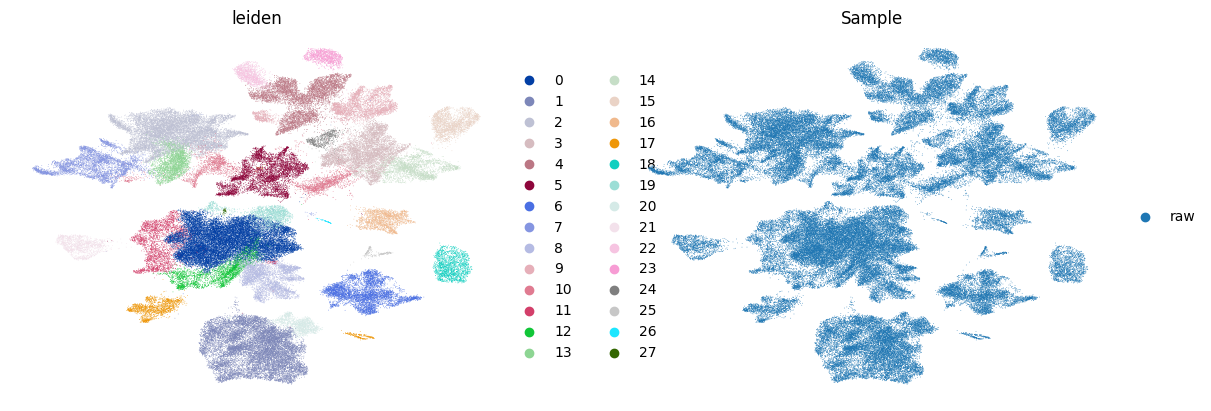

In [31]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [32]:
adata.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/integrated.h5ad')

MARKERS

In [33]:
sc.tl.leiden(adata, resolution = 1)

In [34]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [35]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,KCNMA1,128.548706,4.934129,0.000000,0.000000
1,0,CTSB,121.038925,4.241195,0.000000,0.000000
2,0,PSAP,110.743309,4.402812,0.000000,0.000000
3,0,FMNL2,105.509514,3.041520,0.000000,0.000000
4,0,DMXL2,103.416748,3.470266,0.000000,0.000000
...,...,...,...,...,...,...
827784,39,ANTKMT,2.130247,4.333937,0.038304,0.049264
827785,39,SYPL1,2.129139,2.879771,0.038399,0.049381
827786,39,TGM2,2.129133,1.979905,0.038399,0.049381
827787,39,APP,2.125627,1.170929,0.038704,0.049767


In [36]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...:   0%|          | 0/40 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PLA2G7,0.9916,0.0084,4.771087,0.000361,0.000022,0.0,0.25,6.889716,7.202375,3.187334,...,0.512361,0.030079,0.309978,0.020502,3.799685,0.200883,True,0 vs Rest,0,Rest
APOC1,0.9884,0.0116,4.445082,0.000138,0.000015,0.0,0.25,6.604803,6.797234,4.351696,...,0.288286,0.039195,0.143384,0.021124,1.571617,0.168283,True,0 vs Rest,0,Rest
ACP5,0.9884,0.0116,4.445082,0.000293,0.000026,0.0,0.25,6.940169,7.205925,3.993930,...,0.471906,0.066314,0.237310,0.028162,2.822078,0.266284,True,0 vs Rest,0,Rest
APOE,0.9862,0.0138,4.269190,0.001670,0.000142,0.0,0.25,6.314099,6.458326,3.907996,...,2.823700,0.259953,0.427332,0.052298,15.747479,1.160596,True,0 vs Rest,0,Rest
CTSL,0.9858,0.0142,4.240211,0.000477,0.000051,0.0,0.25,5.545275,5.894362,3.189817,...,0.972361,0.104370,0.346204,0.049497,5.746952,0.544349,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RTF1,0.5484,0.4516,0.194208,0.000073,0.000076,0.0,0.25,-0.030553,-0.027554,0.460231,...,0.000000,0.096241,0.000000,0.087255,0.000000,0.753329,False,39 vs Rest,39,Rest
UBE3B,0.5422,0.4578,0.169203,0.000045,0.000044,0.0,0.25,0.072535,0.026766,0.475915,...,0.061224,0.055558,0.061224,0.051851,0.852595,0.415736,False,39 vs Rest,39,Rest
RNF10,0.5346,0.4654,0.138622,0.000084,0.000092,0.0,0.25,-0.098000,-0.090704,0.399768,...,0.102041,0.116211,0.081633,0.105182,0.878272,0.919519,False,39 vs Rest,39,Rest
USP14,0.5102,0.4898,0.040806,0.000073,0.000072,0.0,0.25,0.044575,0.025043,0.427456,...,0.183673,0.106631,0.142857,0.093718,2.342460,0.769754,False,39 vs Rest,39,Rest


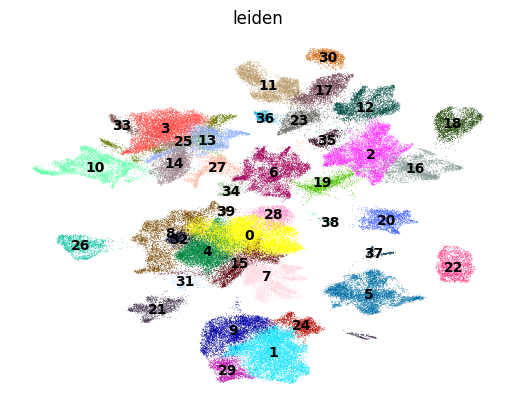

In [37]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

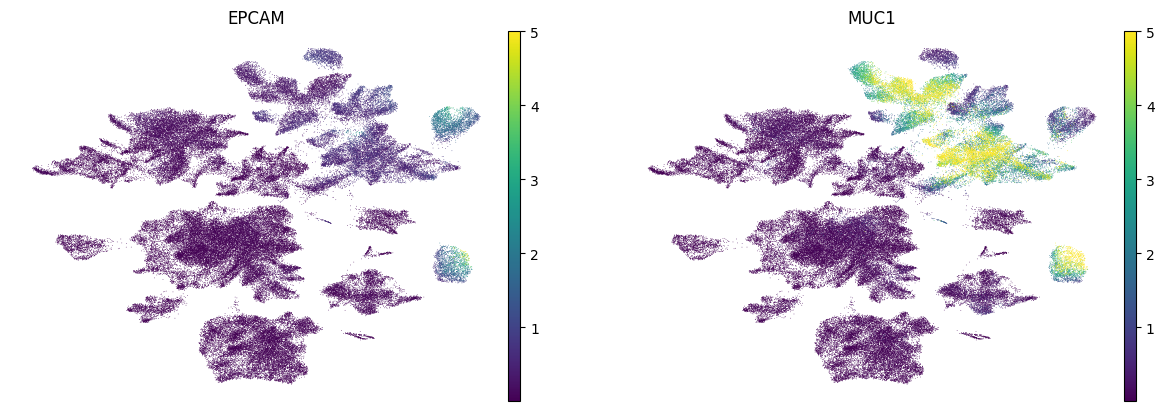

In [38]:
sc.pl.umap(adata, color = ['EPCAM', 'MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5)

In [40]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}

In [41]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

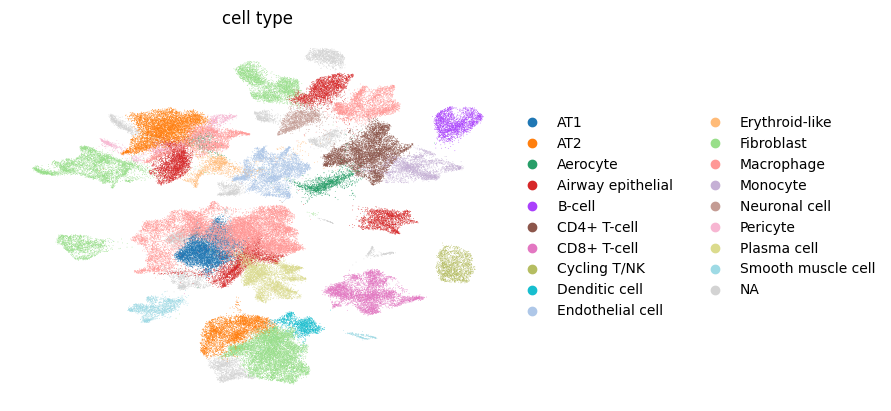

In [42]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [43]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [44]:
model.save('/content/drive/MyDrive/Yeehaw_datasets/model.model')
adata.write_h5ad('/content/drive/MyDrive/Yeehaw_datasets/integrated_1.h5ad')

In [45]:
adata.obs.Sample.unique().tolist()

['raw']

In [6]:
import scanpy as sc
import scvi
adata = sc.read_h5ad('/content/drive/MyDrive/Yeehaw_datasets/integrated_1.h5ad')

In [7]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [8]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,condition
CCCGGAAAGAAATTGC-1_4,raw,False,1627,1627,3958.0,0.0,0.0,2.0,0.050531,0,0,10,2.532928,Fibroblast,control
ATGACCAAGTCCCTAA-1_4,raw,False,1940,1940,3848.0,0.0,0.0,0.0,0.000000,0,0,10,2.610284,Fibroblast,control
ACGTAACGTCACTCTC-1_4,raw,False,1933,1933,3739.0,0.0,0.0,1.0,0.026745,0,0,11,2.682403,Fibroblast,control
TGCTCGTTCCTCGATC-1_4,raw,False,1790,1790,3650.0,0.0,0.0,1.0,0.027397,0,0,11,2.743484,Fibroblast,control
TCCTTCTCAACAAGAT-1_4,raw,False,1923,1923,3638.0,0.0,0.0,1.0,0.027488,0,0,6,2.763194,Endothelial cell,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATTCTTTCGTAGTGT-1_21,raw,False,343,343,412.0,0.0,0.0,0.0,0.000000,0,0,2,24.390244,CD4+ T-cell,control
TTCCGGTTCTTAATCC-1_21,raw,False,362,362,410.0,0.0,0.0,0.0,0.000000,0,0,7,24.390244,Plasma cell,control
TCATTCAAGAGAGGTA-1_21,raw,False,343,343,407.0,0.0,0.0,0.0,0.000000,0,0,7,24.630541,Plasma cell,control
ATGGGTTGTCATTGCA-1_21,raw,False,355,355,401.0,0.0,0.0,0.0,0.000000,0,0,2,25.062656,CD4+ T-cell,control


In [9]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

<ipython-input-9-5562b6606426>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['Sample']).count()


{'raw': 108822}

In [10]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,condition
CCCGGAAAGAAATTGC-1_4,raw,False,1627,1627,3958.0,0.0,0.0,2.0,0.050531,0,0,10,2.532928,Fibroblast,control
ATGACCAAGTCCCTAA-1_4,raw,False,1940,1940,3848.0,0.0,0.0,0.0,0.000000,0,0,10,2.610284,Fibroblast,control
ACGTAACGTCACTCTC-1_4,raw,False,1933,1933,3739.0,0.0,0.0,1.0,0.026745,0,0,11,2.682403,Fibroblast,control
TGCTCGTTCCTCGATC-1_4,raw,False,1790,1790,3650.0,0.0,0.0,1.0,0.027397,0,0,11,2.743484,Fibroblast,control
TCCTTCTCAACAAGAT-1_4,raw,False,1923,1923,3638.0,0.0,0.0,1.0,0.027488,0,0,6,2.763194,Endothelial cell,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATTCTTTCGTAGTGT-1_21,raw,False,343,343,412.0,0.0,0.0,0.0,0.000000,0,0,2,24.390244,CD4+ T-cell,control
TTCCGGTTCTTAATCC-1_21,raw,False,362,362,410.0,0.0,0.0,0.0,0.000000,0,0,7,24.390244,Plasma cell,control
TCATTCAAGAGAGGTA-1_21,raw,False,343,343,407.0,0.0,0.0,0.0,0.000000,0,0,7,24.630541,Plasma cell,control
ATGGGTTGTCATTGCA-1_21,raw,False,355,355,401.0,0.0,0.0,0.0,0.000000,0,0,2,25.062656,CD4+ T-cell,control


In [11]:
subset = adata[adata.obs['cell type'].isin(['AT1', 'AT2'])].copy()
subset.X = subset.X.toarray()
len(subset.var)

21206

In [12]:
sc.pp.filter_genes(subset, min_cells=100)
len(subset.var)

13709

In [13]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})

In [14]:
subset.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
TAATTCCGTACCCGAC-1_4,raw,False,941,941,1219.0,0.0,0.0,6.0,0.492207,0,0,9,8.210180,AT2,control
GACACGCCAAAGCGTG-1_4,raw,False,809,809,1039.0,0.0,0.0,0.0,0.000000,0,0,4,9.671180,AT1,control
CACTAAGCAGACTCTA-1_4,raw,False,720,720,961.0,0.0,0.0,0.0,0.000000,0,0,9,10.427528,AT2,control
AAGCCATCAGTAACCT-1_4,raw,False,390,390,522.0,0.0,0.0,0.0,0.000000,0,0,4,19.193857,AT1,control
AGTCAACGTTCGAAGG-1_4,raw,False,327,327,441.0,0.0,0.0,0.0,0.000000,0,0,9,22.675737,AT2,control


In [59]:
!pip install tf-nightly
!pip install tfp-nightly
!pip install tensorflow
!pip install tensorflow-probability
import diffxpy.api as de

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.5/625.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.3 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.1 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'diffxpy'

In [15]:
!pip install diffxpy

In [16]:
import diffxpy.api as de
res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

training location model: False
training scale model: True
iter   0: ll=106640555.775034
iter   1: ll=106640555.775034, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=72735052.893175, converged: 0.00% (loc: 0.00%, scale update: True), in 186.54sec
iter   3: ll=72735052.893175, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=72049547.241282, converged: 99.67% (loc: 99.67%, scale update: True), in 176.23sec
iter   5: ll=72049547.241282, converged: 99.67% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=72014206.096449, converged: 99.97% (loc: 99.97%, scale update: True), in 89.39sec
iter   7: ll=72014206.096449, converged: 99.97% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=71996315.845016, converged: 99.99% (loc: 99.99%, scale update: True), in 32.53sec
iter   9: ll=71996315.845016, converged: 99.99% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=71995901.243170, converged: 99.99% (loc:

ZeroDivisionError: float division by zero

In [ ]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
subset.obs.cell_type.unique()

In [ ]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")

In [ ]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

In [ ]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

In [ ]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist()
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True)

SCVI version

In [17]:
model  = scvi.model.SCVI.load('/content/drive/MyDrive/Yeehaw_datasets/model.model', adata)

INFO     File /content/drive/MyDrive/Yeehaw_datasets/model.model/model.pt already downloaded                       


/usr/local/lib/python3.10/dist-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_locat

In [18]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )
scvi_de

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
TYMP,1.0000,0.0000,18.420681,0.000789,0.000033,0.0,0.25,4.922321,4.868398,1.298513,0.719565,9.715365,1.863644,0.018963,0.657042,0.012769,9.238410,0.107038,True
RBM47,1.0000,0.0000,18.420681,0.001532,0.000086,0.0,0.25,4.379003,4.374041,1.040439,0.486109,8.323446,3.432531,0.043358,0.786727,0.025157,17.007225,0.202440,True
PRKCD,1.0000,0.0000,18.420681,0.000103,0.000007,0.0,0.25,4.356458,4.393673,1.162480,0.447582,8.491875,0.220870,0.005622,0.178318,0.005241,1.141601,0.039349,True
PLCG1,1.0000,0.0000,18.420681,0.000003,0.000057,0.0,0.25,-4.330082,-4.374976,1.036361,-8.201756,-0.414120,0.004728,0.075377,0.004559,0.069468,0.016299,0.660409,True
HLA-DQB1,1.0000,0.0000,18.420681,0.000198,0.000002,0.0,0.25,7.378034,7.444153,1.935899,-2.239604,14.043976,0.563150,0.002096,0.321006,0.001144,2.430517,0.007961,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STRN3,0.3784,0.6216,-0.496345,0.000311,0.000297,0.0,0.25,0.066514,0.075302,0.296509,-1.582006,1.381294,0.736907,0.416604,0.420973,0.281780,3.621047,3.270556,False
GIGYF2,0.3668,0.6332,-0.545970,0.000258,0.000258,0.0,0.25,-0.000752,0.006377,0.281126,-1.541319,1.483826,0.539847,0.339042,0.350388,0.248047,2.667357,2.688086,False
FAM193A,0.3610,0.6390,-0.571026,0.000174,0.000181,0.0,0.25,-0.057748,-0.055763,0.290483,-1.361608,1.526389,0.332824,0.238328,0.248734,0.190585,1.720599,1.940120,False
PCBP2,0.3472,0.6528,-0.631370,0.000145,0.000155,0.0,0.25,-0.095847,-0.089621,0.261730,-1.032714,0.901294,0.271528,0.181438,0.215637,0.153326,1.362492,1.408361,False


In [19]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
YAP1,0.9890,0.0110,4.498798,6.667316e-07,3.299169e-04,0.0,0.25,-9.643167,-11.015896,6.963110,-24.198738,15.179791,0.000844,0.621010,0.000507,0.309987,0.002152,3.542689,True
CNN3,0.9870,0.0130,4.329720,2.069473e-07,1.458946e-04,0.0,0.25,-9.103902,-10.483232,5.424298,-20.189735,10.009344,0.000000,0.231085,0.000000,0.155994,0.000000,1.316461,True
ADAMTSL3,0.9872,0.0128,4.345427,1.458723e-07,6.897848e-05,0.0,0.25,-9.018237,-9.729926,5.170090,-21.961411,8.393503,0.000169,0.074805,0.000169,0.047170,0.000539,0.531390,True
TSHZ2,0.9994,0.0006,7.417964,4.181539e-06,1.019742e-03,0.0,0.25,-8.687285,-8.871878,2.152612,-14.709329,0.689343,0.000338,1.747140,0.000338,0.437774,0.003512,10.416591,True
TANC1,0.9842,0.0158,4.131819,8.782208e-07,3.019648e-04,0.0,0.25,-8.498421,-9.813910,5.575112,-19.166050,12.046236,0.000675,0.539917,0.000675,0.268534,0.001297,3.162109,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1QB,0.9984,0.0016,6.436144,3.008294e-04,2.480548e-06,0.0,0.25,8.091573,8.112356,2.889983,-4.506898,18.686449,0.742818,0.002573,0.308848,0.001429,3.006804,0.010787,True
VSIG4,0.9998,0.0002,8.516943,2.266322e-04,1.843061e-06,0.0,0.25,8.102895,8.158417,2.080492,-0.530289,15.187642,0.607223,0.001715,0.320500,0.001429,2.636426,0.009798,True
STAB1,0.9990,0.0010,6.906745,2.604135e-04,3.047599e-06,0.0,0.25,8.391969,8.158581,3.085485,-2.249091,21.485811,0.387873,0.003240,0.256501,0.002192,2.537815,0.022727,True
ANKRD22,0.9998,0.0002,8.516943,1.685424e-04,7.164601e-07,0.0,0.25,8.601646,8.725989,2.087393,0.052076,14.471614,0.238263,0.001239,0.143870,0.000858,1.351571,0.006508,True


In [20]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
YAP1,0.9890,0.0110,4.498798,6.667316e-07,3.299169e-04,0.0,0.25,-9.643167,-11.015896,6.963110,-24.198738,15.179791,0.000844,0.621010,0.000507,0.309987,0.002152,3.542689,True
CNN3,0.9870,0.0130,4.329720,2.069473e-07,1.458946e-04,0.0,0.25,-9.103902,-10.483232,5.424298,-20.189735,10.009344,0.000000,0.231085,0.000000,0.155994,0.000000,1.316461,True
ADAMTSL3,0.9872,0.0128,4.345427,1.458723e-07,6.897848e-05,0.0,0.25,-9.018237,-9.729926,5.170090,-21.961411,8.393503,0.000169,0.074805,0.000169,0.047170,0.000539,0.531390,True
TSHZ2,0.9994,0.0006,7.417964,4.181539e-06,1.019742e-03,0.0,0.25,-8.687285,-8.871878,2.152612,-14.709329,0.689343,0.000338,1.747140,0.000338,0.437774,0.003512,10.416591,True
TANC1,0.9842,0.0158,4.131819,8.782208e-07,3.019648e-04,0.0,0.25,-8.498421,-9.813910,5.575112,-19.166050,12.046236,0.000675,0.539917,0.000675,0.268534,0.001297,3.162109,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1QB,0.9984,0.0016,6.436144,3.008294e-04,2.480548e-06,0.0,0.25,8.091573,8.112356,2.889983,-4.506898,18.686449,0.742818,0.002573,0.308848,0.001429,3.006804,0.010787,True
VSIG4,0.9998,0.0002,8.516943,2.266322e-04,1.843061e-06,0.0,0.25,8.102895,8.158417,2.080492,-0.530289,15.187642,0.607223,0.001715,0.320500,0.001429,2.636426,0.009798,True
STAB1,0.9990,0.0010,6.906745,2.604135e-04,3.047599e-06,0.0,0.25,8.391969,8.158581,3.085485,-2.249091,21.485811,0.387873,0.003240,0.256501,0.002192,2.537815,0.022727,True
ANKRD22,0.9998,0.0002,8.516943,1.685424e-04,7.164601e-07,0.0,0.25,8.601646,8.725989,2.087393,0.052076,14.471614,0.238263,0.001239,0.143870,0.000858,1.351571,0.006508,True


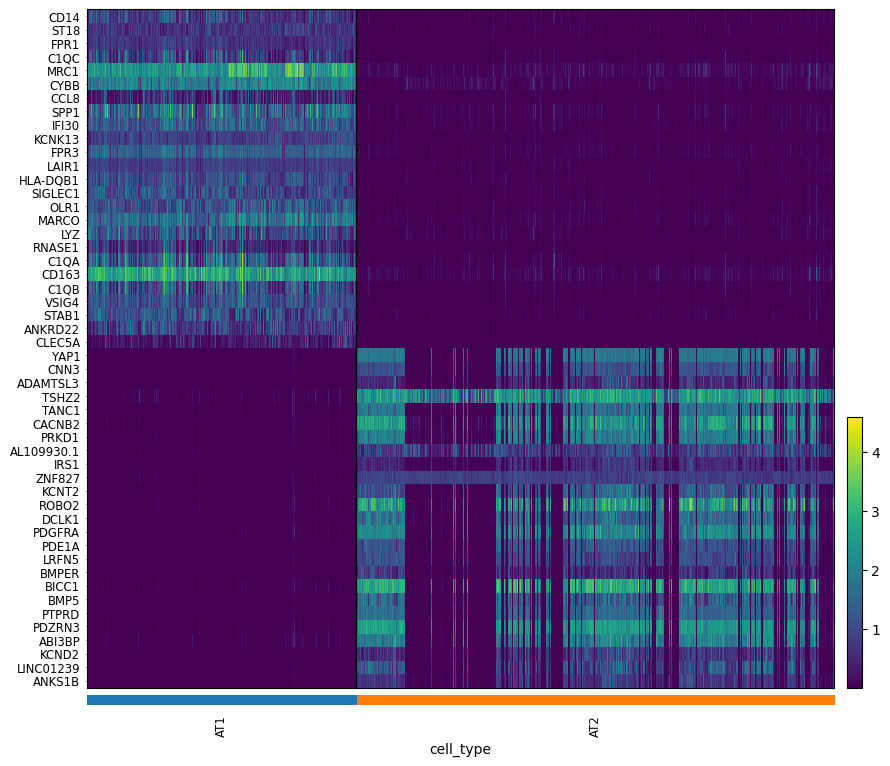

In [21]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist()
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)